## Implementation of Linear regression using python

In [1]:
### import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


## Load the dataset

In [2]:
df1=pd.read_csv("weight-height.csv")
df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,169.034243,163.852461


### Standardize numerical features

In [3]:
col=["Height","Weight"]
S1=MinMaxScaler()
df1[col]=S1.fit_transform(df1[col])
df1


,Gender,Height,Weight
0,Male,0.165212,0.863139
1,Male,0.122482,0.475476
2,Male,0.167432,0.721131
3,Male,0.147361,0.756699
4,Male,0.131761,0.689999
...,...,...,...
9995,Female,0.100470,0.351101
9996,Female,0.108016,0.517161
9997,Female,0.081028,0.310660
9998,Female,0.968224,0.482988


## Prepare dependant and independant variables

In [4]:
X=df1[["Height"]].to_numpy()
Y=df1[["Weight"]].to_numpy()
Y.shape

(10000, 1)

## Split the data into training and test set

In [5]:
 X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=67)

In [6]:
# Create a linear regression model

model=LinearRegression()



Note: Learning more about Linear Regression model here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 



In [7]:
## Training  Linear regressions model 

In [8]:
model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
## Calculating the Mean Squared Error (MSE) and R-squared (R2)
Y_pred=model.predict(X_test)

mse=mean_squared_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)
print(mse)
print(r2)

# Print model coefficients
print(model.coef_[0])
print(model.intercept_)

0.0044380478890117024
0.8135299373473699
[3.54709605]
[0.10829265]


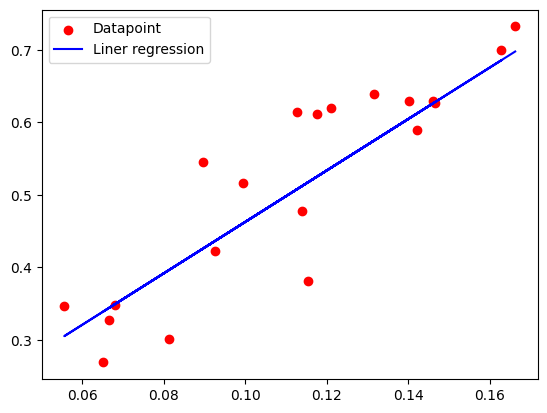

In [10]:
# Plot the linear regression Model 
plt.scatter(X_test[0:20],Y_test[0:20],color="Red",label="Datapoint")
plt.plot(X_test[0:20],Y_pred[0:20],color="Blue",label="Liner regression")
plt.legend()


In [11]:
## Load the Height and weight  to indipendent and dependent variable 

In [12]:
df2=pd.read_csv("weight-height.csv")
X = df2['Height'].values.reshape(-1, 1)
X.shape
Y=df2["Weight"].values

In [13]:
## Standardizes the features X and target variable y using Z-score normalization (also called Standardization). 
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
Y = (Y - np.mean(Y, axis=0)) / np.std(Y, axis=0)


In [14]:
#add another feature to X corresponding to bias
X = np.hstack((np.ones((X.shape[0], 1)), X))
X

array([[ 1.        ,  1.75827913],
       [ 1.        ,  0.56277158],
       [ 1.        ,  1.82037531],
       ...,
       [ 1.        , -0.59704831],
       [ 1.        , 24.22511229],
       [ 1.        , -1.05110595]], shape=(10000, 2))

In [ ]:
import numpy as np
theta = np.zeros(X.shape[1])
iterations = 1000
learning_rate = 0.01
mseh = []

for i in range(iterations):
    y_pred = X.dot(theta)
    error = y_pred - Y
    gradient = (1 / len(Y)) * X.T.dot(error)
    theta = theta - learning_rate * gradient
    mse = (error**2).mean()
    mseh.append(mse)

print("Final weights:", theta)


Final weights: [-1.50162682e-15  8.44412778e-01]


<img src="https://i.postimg.cc/wMYVXD65/1.png" alt="Image Description" width="500">

In [18]:
for i in range(iterations):
    y_pred = np.dot(X, theta) 
    mse = mean_squared_error(Y, y_pred)   
    mseh.append(mse)
    print(f"Iteration {i+1}: MSE = {mse}")
    gradient = np.dot(X.T, (y_pred - Y)) / len(Y)
    theta -= learningrate * gradient

Iteration 1: MSE = 0.2869054926644624
Iteration 2: MSE = 0.28690549263801457
Iteration 3: MSE = 0.2869054926120931
Iteration 4: MSE = 0.28690549258668746
Iteration 5: MSE = 0.2869054925617874
Iteration 6: MSE = 0.28690549253738284
Iteration 7: MSE = 0.286905492513464
Iteration 8: MSE = 0.28690549249002095
Iteration 9: MSE = 0.2869054924670446
Iteration 10: MSE = 0.2869054924445254
Iteration 11: MSE = 0.28690549242245433
Iteration 12: MSE = 0.2869054924008225
Iteration 13: MSE = 0.2869054923796212
Iteration 14: MSE = 0.2869054923588417
Iteration 15: MSE = 0.2869054923384758
Iteration 16: MSE = 0.2869054923185151
Iteration 17: MSE = 0.2869054922989517
Iteration 18: MSE = 0.2869054922797776
Iteration 19: MSE = 0.28690549226098505
Iteration 20: MSE = 0.2869054922425664
Iteration 21: MSE = 0.2869054922245144
Iteration 22: MSE = 0.28690549220682154
Iteration 23: MSE = 0.2869054921894808
Iteration 24: MSE = 0.2869054921724851
Iteration 25: MSE = 0.28690549215582767
Iteration 26: MSE = 0.28690

Final weights (theta): [-1.50162682e-15  8.44412778e-01]


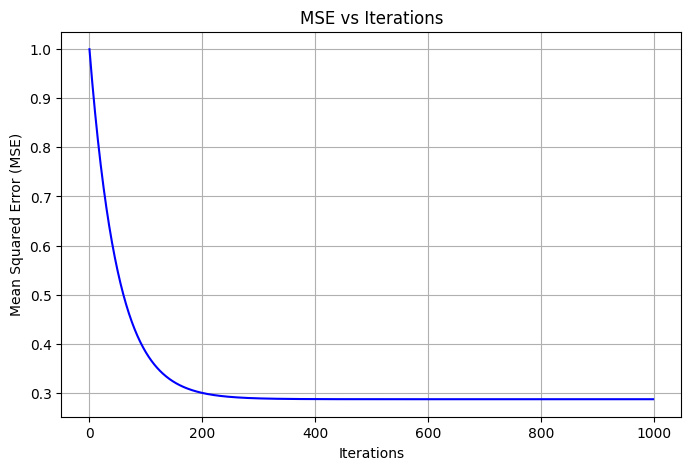

In [24]:

import numpy as np
import matplotlib.pyplot as plt

theta = np.zeros(X.shape[1])  
iterations = 1000
learning_rate = 0.01
mseh = []

for i in range(iterations):
    y_pred = X.dot(theta)
    error = y_pred - Y
    gradient = (1 / len(Y)) * X.T.dot(error)
    theta = theta - learning_rate * gradient
    mse = (error**2).mean()
    mseh.append(mse)

print("Final weights (theta):", theta)

plt.figure(figsize=(8,5))
plt.plot(range(len(mseh)), mseh, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Iterations')
plt.grid(True)
plt.show()


## You are required to fit a linear function on Food_delivery_times dataset
Description about the dataset: This dataset is designed for predicting food delivery times based on various influencing factors such as distance, weather, traffic conditions, and Preperation time. 
1. Feature selection: Consider Food_delivery_time is effected by four features (attributes) given in the dataset, which are Distance_km, Preparation_Time_min, Traffic, Weather
2. Since Traffic, Weather are having categorical values, you need to convert them into numerical using the categorical encoding methods.
3. Now, fit a linear regression model considering Distance_km, Preparation_Time_min, Traffic, and Weather as independant variables and Delivery_Time_min as dependant varibal. 


Note: In lab record, you can write the statements relevant to linear regression.

Dataset preview:


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68



Column types:
Order_ID                    int64
Distance_km               float64
Weather                    object
Traffic_Level              object
Time_of_Day                object
Vehicle_Type               object
Preparation_Time_min        int64
Courier_Experience_yrs    float64
Delivery_Time_min           int64
dtype: object


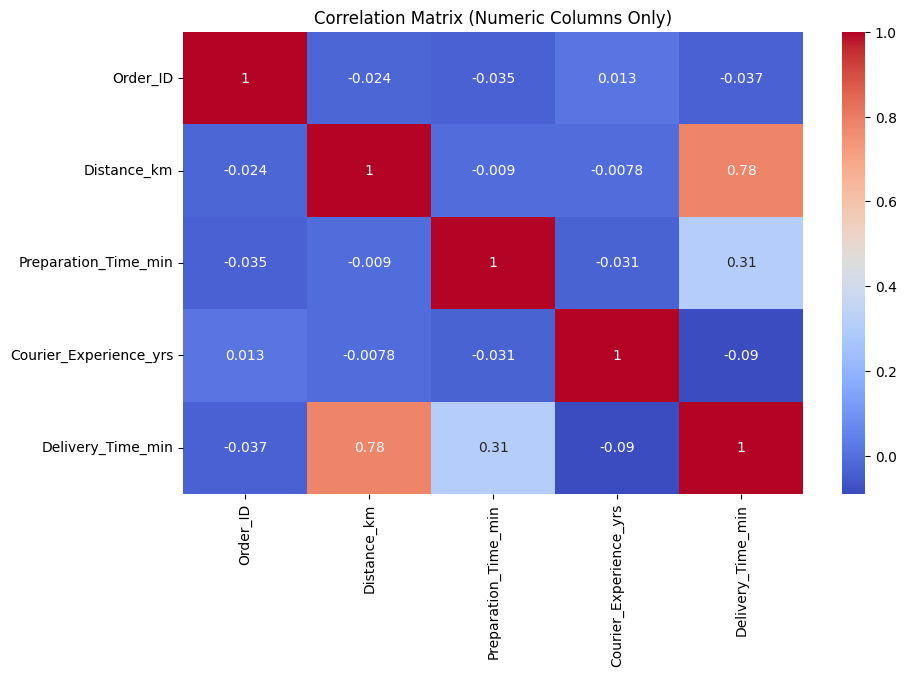

In [23]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Food_Delivery_Times.csv")

# Display first few rows
print("Dataset preview:")
display(data.head())

# Display column types
print("\nColumn types:")
print(data.dtypes)

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=np.number)

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Columns Only)")
plt.show()
